In [1]:
#LET US IMPLEMENT PERCEPTRON ON OUR OWN FROM SCRATCH

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# LET US GET THE DATASET FROM SKLEARN ITSELF

In [4]:
from sklearn.datasets import make_blobs

In [5]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)

In [6]:
# YOU HAVE GOT THE DATASET X AND Y LET US DO THE FURTHER THINGS

In [7]:
X,Y

(array([[  5.83801528,  -9.29715058],
        [  5.67102739,  -9.76225984],
        [  3.15598083,   5.95298368],
        [  3.87586762,   5.94663718],
        [  3.94478532,   4.85652467],
        [  2.82983681,   4.85628288],
        [  4.99059695,  -9.04869246],
        [  5.31414039,  -9.94714146],
        [  2.37830662,   4.78915634],
        [  2.54234378,   5.46906286],
        [  3.64313269,   5.42712386],
        [  3.88101257,  -9.59334486],
        [  6.04666737, -10.65352872],
        [  1.65611544,   5.46167742],
        [  3.74596695,  -8.90825282],
        [  7.03787016,  -9.34562175],
        [  5.88730132,  -8.922587  ],
        [  3.24365815,   4.46320246],
        [  2.54406041,   6.89173024],
        [  2.44257249,   6.84606548],
        [  4.94431973,  -9.4953734 ],
        [  4.4198443 ,  -9.84249464],
        [  4.71934142,  -9.03829618],
        [  6.1858842 ,  -9.61888801],
        [  5.18940868,  -9.52767586],
        [  6.40648699, -11.98053303],
        [  6

In [8]:
X.shape,Y.shape

((500, 2), (500,))

In [9]:
#WE HAVE GOT 500 datapoints with 2 features and we have got 500 answers for that

In [10]:
# LET US CHECK THE Y DATASET

In [11]:
np.unique(Y)
# WE HAVE 2 unique values

array([0, 1])

In [12]:
#LET US SCATTER THE DATASET

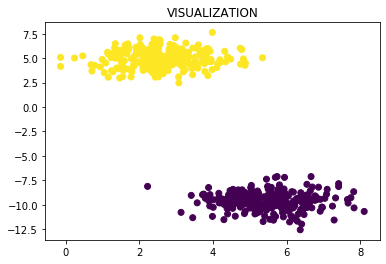

In [13]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title("VISUALIZATION")
plt.show()
# IT MEANS THAT IT IS LINEARY SEPERABLE JUST BY DRAWING A HYPOTHESIS

In [14]:
#LET US IMPLEMENT THE PERCEPTRON FROM SCRATCH

In [15]:
def sigmoid(z):
    
    return 1.0/(1+np.exp(-z))

In [16]:
#IT USES BROADCASTING RULE AND IT WILL GET THE SIGMOID FOR ALL THE VALUES
# ex 
a=np.array([1,2,3,4])
sigmoid(a)#FOT LIST IT WONT WORK

array([0.73105858, 0.88079708, 0.95257413, 0.98201379])

In [17]:
def predict(X,weights):
    #YOU HAVE TO GET THE DOT PRODUCT AND THEN YOU PASS THROUGH A SIGMOID FUNCTION THEN YOU HAVE TO RETURN THE OUTPUT
    output=np.dot(X,weights)
    answer=sigmoid(output)
    #print(answer)
    return answer

In [18]:
def loss(X,Y,weights):
    #LOSS MEANS THE COST FUNCTION WE HAVE USED CROSS_ENTROPHY IN THIS WHICH IS USED FOR BINARY CLASSIFICATION AS IT 
    #GIVES YOU THE SHAPE OF CONVEX AND YOU CAN MOVE TOWARDS ONE OPTIMAL POINT
    #GET THE Y_
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    #lossanswer=np.mean(loss)
    return cost

In [19]:
# NOW YOU HAVE TO UPDATE THE WEIGHTS
def update(X,Y,weights,learning_rate):
    '''THIS IS FOR ONE EPOCH'''
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_ -Y)
    length=X.shape[0]
    #ndw=dw/float(length)
    weights=weights-learning_rate*dw/(float(length))
    #print(weights)
    return weights
    

In [20]:
def train(X,Y,max_iter):
    
    newanswer=np.ones((X.shape[0],1))
    #YOU HAVE ADDED BIAS TO IT
    X=np.hstack((newanswer,X))
    # YOU HAVE INITLIAZED WEIGHTS
    weights=np.zeros(X.shape[1])
    
    learning_rate=0.5
    
    for epoch in range(max_iter):
        
        weights=update(X,Y,weights,learning_rate)
        #print(weights)
        
        # FOR EVERY 10 ITERATIONS WE WILL FIND THE LOSS FUNCTION
        if epoch%10==0:
            lossans=loss(X,Y,weights)
            print(epoch,lossans)
            
    return weights

In [21]:
updatedweights=train(X,Y,10000)

0 0.0005716427275807603
10 0.0005380401348680294
20 0.0005082724670657031
30 0.00048171316755303014
40 0.0004578656677465869
50 0.00043633126162387164
60 0.0004167860730917803
70 0.00039896424579255804
80 0.0003826454765941762
90 0.00036764563598875455
100 0.0003538096180227691
110 0.00034100582436112414
120 0.000329121862269407
130 0.000318061155516914
140 0.00030774024965011447
150 0.0002980866509526152
160 0.0002890370795790494
170 0.0002805360470141639
180 0.00027253468963370637
190 0.00026498980608030443
200 0.00025786305803244186
210 0.00025112030286209876
220 0.0002447310334388654
230 0.00023866790550916174
240 0.00023290633706457093
250 0.00022742416720765513
260 0.00022220136444313116
270 0.00021721977622655942
280 0.00021246291311129397
290 0.00020791576203619798
300 0.00020356462425960025
310 0.0001993969742209796
320 0.00019540133624005012
330 0.00019156717647415884
340 0.00018788480797277972
350 0.0001843453070113275
360 0.0001809404391692547
370 0.00017766259385202044
380

5510 1.861028558322164e-05
5520 1.857913127091282e-05
5530 1.8548083651338636e-05
5540 1.851714217254976e-05
5550 1.8486306286433288e-05
5560 1.845557544865029e-05
5570 1.8424949118632464e-05
5580 1.8394426759504373e-05
5590 1.8364007838094515e-05
5600 1.8333691824891763e-05
5610 1.830347819399803e-05
5620 1.8273366423112938e-05
5630 1.824335599349245e-05
5640 1.821344638993998e-05
5650 1.8183637100753056e-05
5660 1.815392761768332e-05
5670 1.8124317435957824e-05
5680 1.809480605419415e-05
5690 1.8065392974409064e-05
5700 1.8036077701955643e-05
5710 1.800685974555277e-05
5720 1.7977738617165844e-05
5730 1.7948713832074744e-05
5740 1.791978490879337e-05
5750 1.7890951369040113e-05
5760 1.7862212737742918e-05
5770 1.7833568542971088e-05
5780 1.7805018315958145e-05
5790 1.7776561591033816e-05
5800 1.7748197905608503e-05
5810 1.771992680016791e-05
5820 1.769174781821881e-05
5830 1.766366050628287e-05
5840 1.763566441386723e-05
5850 1.760775909344523e-05
5860 1.7579944100407693e-05
5870 1.7

In [22]:
#LOSS HAS BEEN REDUCED A LOT

In [23]:
def test(X,Y,updatedweights,labels):
    
    correctpredictions=predict(X,updatedweights)
    pred=np.zeros(X.shape[0])
    if labels:
        pred[correctpredictions>=0.5]=1
        return pred
    else:
        return correctpredictions
        

In [24]:
newanswer=np.ones((X.shape[0],1))
#YOU HAVE ADDED BIAS TO IT
X=np.hstack((newanswer,X))
finalpredictions=test(X,Y,updatedweights,True)

In [25]:
print(finalpredictions)

[0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.

In [26]:
print(Y)

[0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0
 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1
 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 0 1 1 0 0 

In [27]:
Y==finalpredictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
np.sum(Y==finalpredictions)#ALL OF THEM ARE RIGHT

500

In [32]:
#IT IS A PERFECT PREDICTION
print(updatedweights)

[0.20447613 0.15196309 2.52828287]


In [33]:
#THIS IS w0,w1,w2